In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## **Étape 1 : Exploration et Premier Diagnostic** **texte en gras**

### 📊 Load Dataset
We read the CSV files that contains information about movies and tv shows on streaming platforms.

In [ ]:
file1 = pd.read_csv("/content/drive/MyDrive/GENAI/Week3/Hackathon/MoviesOnStreamingPlatforms.csv")
df1 = pd.DataFrame(file1)
df1.head()

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0


In [ ]:
df1["Type"] = "Movies"

In [ ]:
df1.drop_duplicates(inplace=True)

In [ ]:
file2 = pd.read_csv("/content/drive/MyDrive/GENAI/Week3/Hackathon/tv_shows.csv")
df2 = pd.DataFrame(file2)
df2.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


In [ ]:
df2["Type"] = "TV Shows"

In [ ]:
df2.drop(columns=['IMDb'], inplace=True)

In [ ]:
df2.drop_duplicates(inplace=True)

We added a column to each DataFrame to specify whether the content is a movie or a series, and then concatenated the two DataFrames.

In [ ]:
df3 = pd.concat([df1, df2], axis=0)
df3.head()

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,Movies
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,Movies
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,Movies
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,Movies
4,4,5,Roma,2018,18+,94/100,1,0,0,0,Movies


In [ ]:
df3.shape

(14883, 11)

We have a total of 14 883 movies and tv shows

Using web scraping, we retrieved a missing column from both datasets: the genre of the movie or series. This information was then added to the previously concatenated DataFrame, as it will be useful for future analyses.

In [ ]:
import requests
from tqdm import tqdm

tqdm.pandas()

API_KEY = "f0e52ba803b4b1cc7e190ec4c432c706"

mapping = requests.get(
    f"https://api.themoviedb.org/3/genre/movie/list?api_key={API_KEY}&language=en-US"
).json()['genres']
id2name = {g['id']: g['name'] for g in mapping}

def fetch_tmdb_genres(title):
    res = requests.get(
        f"https://api.themoviedb.org/3/search/movie?api_key={API_KEY}&query={title}"
    ).json()
    results = res.get('results') or []
    if results:
        genre_ids = results[0].get('genre_ids', [])
        return [id2name[gid] for gid in genre_ids if gid in id2name]
    return []

df3['GenresList'] = df3['Title'].progress_apply(fetch_tmdb_genres)

100%|██████████| 14883/14883 [20:34<00:00, 12.06it/s]


In [ ]:
df3 = pd.read_csv("/content/drive/MyDrive/GENAI/Week3/Hackathon/df3.csv")

In [ ]:
df3.rename(columns={"GenresList" : "Genre"}, inplace=True)

In [ ]:
df3.head()

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Genre
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,Movies,"['Crime', 'Drama', 'History']"
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,Movies,"['Drama', 'Family', 'Comedy']"
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,Movies,"['Documentary', 'Drama']"
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,Movies,"['Adventure', 'Drama', 'History']"
4,4,5,Roma,2018,18+,94/100,1,0,0,0,Movies,"['Drama', 'History', 'Romance', 'Mystery']"


In [ ]:
df3.shape

(14883, 12)

In [ ]:
df3.to_csv("/content/drive/MyDrive/GENAI/Week3/Hackathon/df3.csv")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/GENAI/Week3/Hackathon/df3.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14883 entries, 0 to 14882
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0.1     14883 non-null  int64 
 1   Unnamed: 0       14883 non-null  int64 
 2   ID               14883 non-null  int64 
 3   Title            14883 non-null  object
 4   Year             14883 non-null  int64 
 5   Age              8579 non-null   object
 6   Rotten Tomatoes  14876 non-null  object
 7   Netflix          14883 non-null  int64 
 8   Hulu             14883 non-null  int64 
 9   Prime Video      14883 non-null  int64 
 10  Disney+          14883 non-null  int64 
 11  Type             14883 non-null  object
 12  Genre            14883 non-null  object
dtypes: int64(8), object(5)
memory usage: 1.5+ MB


In [ ]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,ID,Year,Netflix,Hulu,Prime Video,Disney+
count,14883.000000,14883.000000,14883.000000,14883.000000,14883.000000,14883.000000,14883.000000,14883.000000
mean,7441.000000,4009.130081,4057.179265,2009.300208,0.380703,0.179265,0.399382,0.085534
std,4296.496363,2584.832384,2589.022412,16.652795,0.485576,0.383587,0.489788,0.279684
min,0.000000,0.000000,1.000000,1904.000000,0.000000,0.000000,0.000000,0.000000
25%,3720.500000,1860.000000,1864.500000,2009.000000,0.000000,0.000000,0.000000,0.000000
50%,7441.000000,3720.000000,3826.000000,2016.000000,0.000000,0.000000,0.000000,0.000000
75%,11161.500000,5793.500000,5794.500000,2018.000000,1.000000,0.000000,1.000000,0.000000
max,14882.000000,9514.000000,9515.000000,2021.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isna().mean() * 100

,0
Unnamed: 0.1,0.000000
Unnamed: 0,0.000000
ID,0.000000
Title,0.000000
Year,0.000000
Age,42.357052
Rotten Tomatoes,0.047034
Netflix,0.000000
Hulu,0.000000
Prime Video,0.000000


# **Étape 2 : Nettoyage et Préparation des Données**

We converted the 'genre' column, which was initially of type object, into a proper list format.

In [ ]:
import ast

df["Genre"] = df["Genre"].apply(lambda x: ast.literal_eval(x))
df.head()

,Unnamed: 0.1,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Genre
0,0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,Movies,"[Crime, Drama, History]"
1,1,1,2,Dangal,2016,7+,97/100,1,0,0,0,Movies,"[Drama, Family, Comedy]"
2,2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,Movies,"[Documentary, Drama]"
3,3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,Movies,"[Adventure, Drama, History]"
4,4,4,5,Roma,2018,18+,94/100,1,0,0,0,Movies,"[Drama, History, Romance, Mystery]"


In [ ]:
df = df[df["Genre"].apply(lambda x : len(x) > 0)]

In [ ]:
df.shape

(11693, 13)

We removed the rows where the genre was not specified, resulting in a final dataset of 11,693 movies.

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Genre
0,0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,Movies,"[Crime, Drama, History]"
1,1,1,2,Dangal,2016,7+,97/100,1,0,0,0,Movies,"[Drama, Family, Comedy]"
2,2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,Movies,"[Documentary, Drama]"
3,3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,Movies,"[Adventure, Drama, History]"
4,4,4,5,Roma,2018,18+,94/100,1,0,0,0,Movies,"[Drama, History, Romance, Mystery]"


In [ ]:
df.drop(columns=['Age', "ID", "Unnamed: 0"], inplace=True)

In [ ]:
df = df[df['Rotten Tomatoes'].notna()]

We removed columns that contained no useful information for our analysis, as well as any remaining null values.

In [ ]:
df["grades"] = df["Rotten Tomatoes"].str.replace("/100", "").astype(float)

In [ ]:
df["grades"] = df["grades"] / 100
df.drop(columns=['Rotten Tomatoes'], inplace=True)

In [ ]:
df.head()

,Unnamed: 0.1,Title,Year,Netflix,Hulu,Prime Video,Disney+,Type,Genre,grades
0,0,The Irishman,2019,1,0,0,0,Movies,"[Crime, Drama, History]",0.98
1,1,Dangal,2016,1,0,0,0,Movies,"[Drama, Family, Comedy]",0.97
2,2,David Attenborough: A Life on Our Planet,2020,1,0,0,0,Movies,"[Documentary, Drama]",0.95
3,3,Lagaan: Once Upon a Time in India,2001,1,0,0,0,Movies,"[Adventure, Drama, History]",0.94
4,4,Roma,2018,1,0,0,0,Movies,"[Drama, History, Romance, Mystery]",0.94


We normalized the Rotten Tomatoes scores to make them suitable for analysis.

In [ ]:
df_normalized = df.copy()

We applied label encoding to the textual data and one-hot encoding to the movie genres in order to use a confusion matrix and identify dependencies between features.

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_dummies = pd.DataFrame(mlb.fit_transform(df_normalized['Genre']), columns=mlb.classes_, index=df_normalized.index)
df_normalized = pd.concat([df_normalized, genre_dummies], axis=1)
df_normalized.drop(columns=['Genre'], inplace=True)
df_normalized

,Unnamed: 0.1,Title,Year,Netflix,Hulu,Prime Video,Disney+,Type,grades,Action,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,The Irishman,2019,1,0,0,0,Movies,0.98,0,...,1,0,0,0,0,0,0,0,0,0
1,1,Dangal,2016,1,0,0,0,Movies,0.97,0,...,0,0,0,0,0,0,0,0,0,0
2,2,David Attenborough: A Life on Our Planet,2020,1,0,0,0,Movies,0.95,0,...,0,0,0,0,0,0,0,0,0,0
3,3,Lagaan: Once Upon a Time in India,2001,1,0,0,0,Movies,0.94,0,...,1,0,0,0,0,0,0,0,0,0
4,4,Roma,2018,1,0,0,0,Movies,0.94,0,...,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14862,14862,Spaced Out,2019,0,0,0,1,TV Shows,0.20,0,...,0,0,0,0,0,1,0,0,0,0
14869,14869,Destination: World,2018,0,0,0,1,TV Shows,0.14,0,...,0,0,0,0,0,0,0,0,0,0
14873,14873,Roll it Back,2019,0,0,0,1,TV Shows,0.14,0,...,0,0,0,0,0,0,0,0,0,0
14875,14875,Love & Vets,2017,0,0,0,1,TV Shows,0.13,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_normalized["Type"] = le.fit_transform(df_normalized["Type"])
df_normalized["Title"] = le.fit_transform(df_normalized["Title"])
df_normalized.head()

,Unnamed: 0.1,Title,Year,Netflix,Hulu,Prime Video,Disney+,Type,grades,Action,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,9560,2019,1,0,0,0,0,0.98,0,...,1,0,0,0,0,0,0,0,0,0
1,1,2302,2016,1,0,0,0,0,0.97,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2369,2020,1,0,0,0,0,0.95,0,...,0,0,0,0,0,0,0,0,0,0
3,3,5139,2001,1,0,0,0,0,0.94,0,...,1,0,0,0,0,0,0,0,0,0
4,4,7569,2018,1,0,0,0,0,0.94,0,...,1,0,0,1,1,0,0,0,0,0


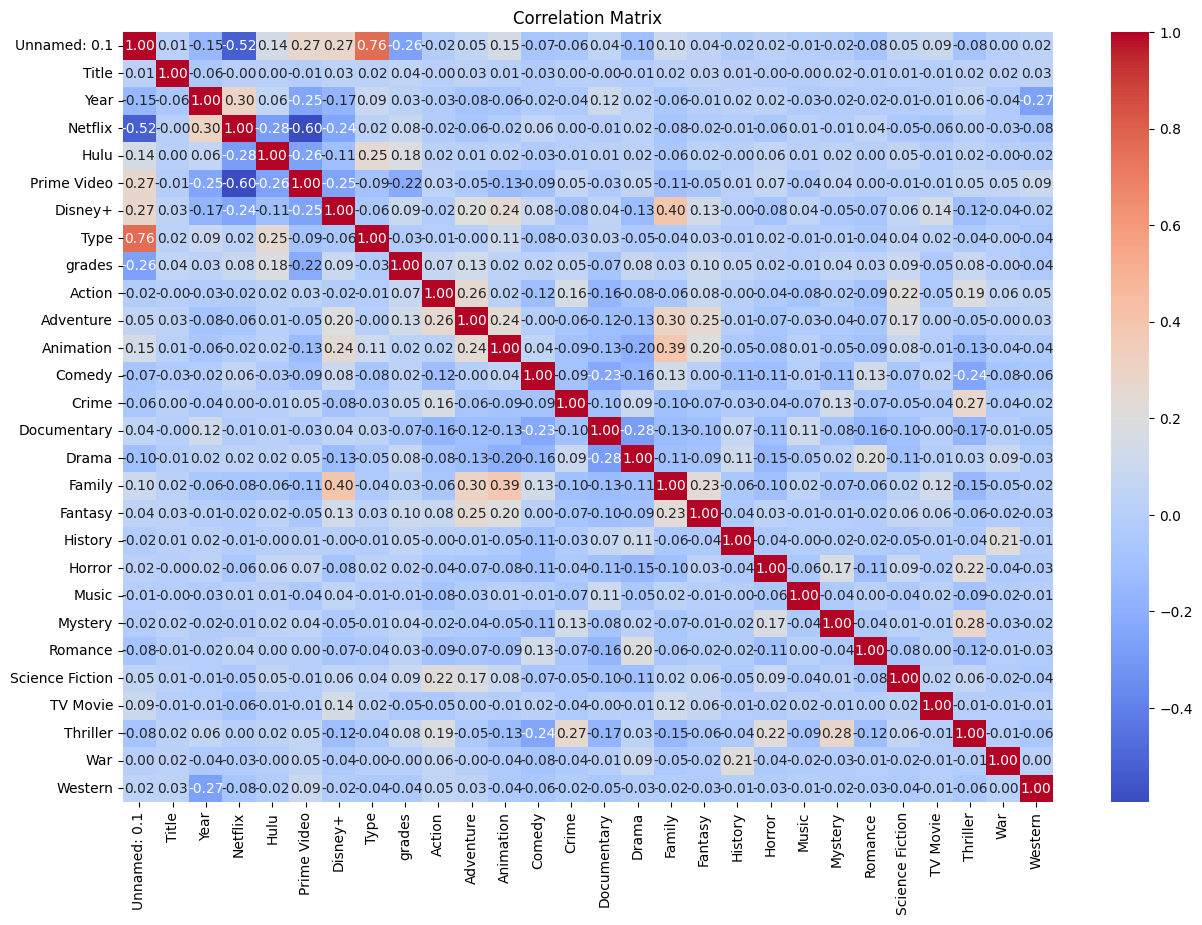

In [ ]:
plt.figure(figsize=(15, 10))
corr = df_normalized.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

The correlation matrix shows weak linear relationships overall. Some related genres like Adventure, Fantasy, and Animation are moderately correlated, and family movies tend to have higher ratings. Platform availability is mostly exclusive, with a slight negative correlation between Netflix and Prime Video. These insights suggest limited linear dependencies.

# **Étape 3 : Analysis**

## **What are the most common genres for top-rated shows and movies across platforms?**

In [ ]:
df.head()

,Unnamed: 0.1,Title,Year,Netflix,Hulu,Prime Video,Disney+,Type,Genre,grades
0,0,The Irishman,2019,1,0,0,0,Movies,"[Crime, Drama, History]",0.98
1,1,Dangal,2016,1,0,0,0,Movies,"[Drama, Family, Comedy]",0.97
2,2,David Attenborough: A Life on Our Planet,2020,1,0,0,0,Movies,"[Documentary, Drama]",0.95
3,3,Lagaan: Once Upon a Time in India,2001,1,0,0,0,Movies,"[Adventure, Drama, History]",0.94
4,4,Roma,2018,1,0,0,0,Movies,"[Drama, History, Romance, Mystery]",0.94


In [ ]:
df.to_csv("df.csv")

In [ ]:
df = pd.read_csv("df.csv")

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
import ast

df['Genre'] = df['Genre'].apply(lambda x: ast.literal_eval(x))

all_genres = df.explode('Genre')

In [ ]:
all_genres.head()

,Unnamed: 0.1,Title,Year,Netflix,Hulu,Prime Video,Disney+,Type,Genre,grades
0,0,The Irishman,2019,1,0,0,0,Movies,Crime,0.98
0,0,The Irishman,2019,1,0,0,0,Movies,Drama,0.98
0,0,The Irishman,2019,1,0,0,0,Movies,History,0.98
1,1,Dangal,2016,1,0,0,0,Movies,Drama,0.97
1,1,Dangal,2016,1,0,0,0,Movies,Family,0.97


In [ ]:
all_genres["Genre"].nunique()

19

In [ ]:
import ipywidgets as widgets

rating_slider = widgets.FloatSlider(
    value = 0.8,
    min = 0.0,
    max = 1.0,
    step = 0.05,
    description = 'Minimum Rating:',
    disabled = False,
    continuous_update = False,
    orientation = 'horizontal',
    readout = True,
)

number_genres = widgets.IntSlider(
    value = 10,
    min = 1,
    max = 19,
    step = 1,
    description = 'Number of Genres:',
    disabled = False,
    continuous_update = False,
)

def plot_genre_distribution(min_rating, num_genres):

  df_filtered = all_genres[all_genres['grades'] >= min_rating]
  grouped_df = df_filtered['Genre'].value_counts().sort_values(ascending=False).head(num_genres)
  plt.figure(figsize=(14, 7))
  sns.barplot(x=grouped_df.index, y=grouped_df.values)
  plt.xlabel("Nombre de titres")
  plt.title(f"{num_genres} genres les plus fréquents (note ≥ {min_rating})")
  plt.show()

widgets.interactive(plot_genre_distribution, min_rating=rating_slider, num_genres=number_genres)

interactive(children=(FloatSlider(value=0.8, continuous_update=False, description='Minimum Rating:', max=1.0, …

The bar chart and data reveal that among top-rated content (rating ≥ 0.8), the most common genres across platforms are:

Drama (208 titles)

Comedy (137 titles)

Adventure (109 titles)

Action (106 titles)

These genres dominate the top-rated segment, suggesting they are consistently well-received by audiences. Drama, in particular, stands out as the leading genre among highly rated shows and movies

## **How do the release years of shows and movies relate to their average ratings?**

In [ ]:
df.head()

,Unnamed: 0.1,Title,Year,Netflix,Hulu,Prime Video,Disney+,Type,Genre,grades
0,0,The Irishman,2019,1,0,0,0,Movies,"[Crime, Drama, History]",0.98
1,1,Dangal,2016,1,0,0,0,Movies,"[Drama, Family, Comedy]",0.97
2,2,David Attenborough: A Life on Our Planet,2020,1,0,0,0,Movies,"[Documentary, Drama]",0.95
3,3,Lagaan: Once Upon a Time in India,2001,1,0,0,0,Movies,"[Adventure, Drama, History]",0.94
4,4,Roma,2018,1,0,0,0,Movies,"[Drama, History, Romance, Mystery]",0.94


In [ ]:
df_grouped = df.groupby('Year')['grades'].mean()
df_grouped.head()

,grades
Year,
1914,0.45
1915,0.48
1916,0.44
1920,0.54
1922,0.58


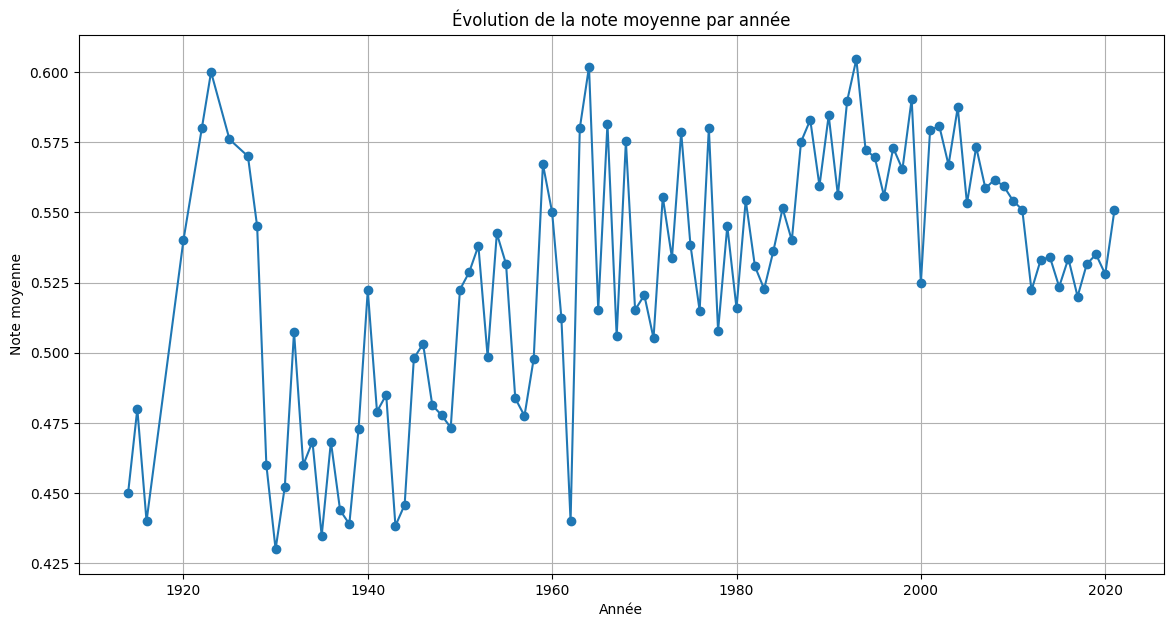

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df_grouped.index, df_grouped.values, marker = 'o')
plt.xlabel("Année")
plt.ylabel("Note moyenne")
plt.title("Évolution de la note moyenne par année")
plt.grid(True)
plt.show()

In [ ]:
df[(df["Year"]>=1920) & (df["Year"]<=1925)]

,Unnamed: 0.1,Title,Year,Netflix,Hulu,Prime Video,Disney+,Type,Genre,grades
4040,4186,The Hunchback of Notre Dame,1923,0,1,0,1,Movies,"[Drama, History, Horror]",0.60
4691,4850,Battleship Potemkin,1925,0,0,1,0,Movies,"[Drama, History, War]",0.72
4887,5048,The Phantom of the Opera,1925,0,0,1,0,Movies,"[Horror, Romance]",0.67
5435,5603,Robin Hood,1922,0,0,1,1,Movies,"[Adventure, Romance]",0.58
5688,5858,The Mark of Zorro,1920,0,0,1,0,Movies,"[Western, Action, Adventure, TV Movie]",0.55
5879,6056,Within Our Gates,1920,0,0,1,0,Movies,"[Drama, Romance, Crime]",0.53
5942,6121,The Eagle,1925,0,0,1,0,Movies,"[Adventure, Drama]",0.53
6346,6530,Little Annie Rooney,1925,0,0,1,0,Movies,"[Comedy, Drama]",0.49
6550,6738,Don Q Son of Zorro,1925,0,0,1,0,Movies,"[Western, Adventure, Romance]",0.47


In [ ]:
df[(df["Year"]<2010) & (df["Type"] == "Movies")]["grades"].mean()

np.float64(0.549331955922865)

In [ ]:
df[(df["Year"]<2010) & (df["Type"] == "TV Shows")]["grades"].mean()

np.float64(0.5567492260061919)

In [ ]:
df[(df["Year"]>=2010) & (df["Type"] == "Movies")]["grades"].mean()

np.float64(0.5355016695818096)

In [ ]:
df[(df["Year"]>=2010) & (df["Type"] == "TV Shows")]["grades"].mean()

np.float64(0.5206378378378378)

In [ ]:
df_decade = df.copy()

In [ ]:
df_decade["decade"] = df_decade["Year"].apply(lambda x: (x // 10) * 10)

In [ ]:
from scipy.stats import f_oneway

groups = [group["grades"] for _, group in df_decade.groupby("decade")]
f_statistic, p_value = f_oneway(*groups)

if p_value < 0.05:
    print("There is a significant difference in average ratings between decades.")
else:
    print("There is no significant difference in average ratings between decades.")

There is a significant difference in average ratings between decades.


The years between 1950 and 2000 show a stable trend in average ratings, often around 0.55 to 0.60.

The early years of cinema (before 1940) display more variable averages, likely due to a limited number of titles.

Since the 2010s, there has been a slight decline in average ratings, driven by lower scores for both films and series. This may reflect stricter critical standards or a drop in content quality.

## **How does the availability of movies and shows differ across platforms like Netflix, Hulu, and Disney+?**

In [ ]:
value = {
  "netflix" : df["Netflix"].sum(),
  "hulu" : df["Hulu"].sum(),
  "disney" : df["Disney+"].sum(),
  "Prime video" : df["Prime Video"].sum()
}

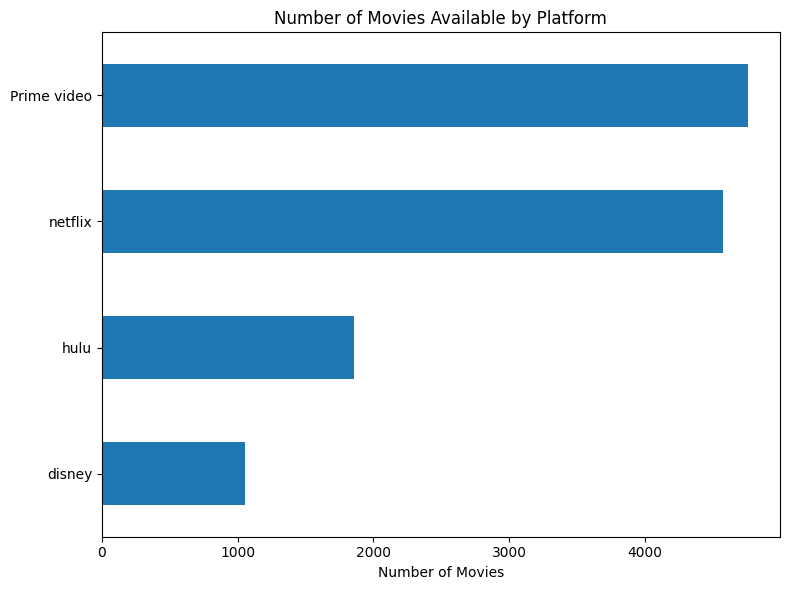

In [ ]:
value = pd.Series(value)

plt.figure(figsize=(8, 6))
value.sort_values().plot(kind='barh')
plt.title("Number of Movies Available by Platform")
plt.xlabel("Number of Movies")
plt.tight_layout()
plt.show()

Prime video leads in terms of the number of available titles.
It is followed by netflix and then Hulu.
Disney+ comes last, likely due to its more focused and franchise-driven catalog.